In [19]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from FS.pso import jfs   # change this to switch algorithm 
import matplotlib.pyplot as plt


# load data
data  = pd.read_csv('ionosphere.csv')
data  = data.values
feat  = np.asarray(data[:, 0:-1])   # feature vector
label = np.asarray(data[:, -1])     # label vector

# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, stratify=label)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

# parameter
k    = 5     # k-value in KNN
N    = 10    # number of particles
T    = 100   # maximum number of iterations
w    = 0.9
c1   = 2
c2   = 2
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'w':w, 'c1':c1, 'c2':c2}

In [20]:
fmdl = jfs(feat, label, opts)


Iteration: 1
Best (PSO): 0.14480022197558265
Iteration: 2
Best (PSO): 0.11766370699223085
Iteration: 3
Best (PSO): 0.11766370699223085
Iteration: 4
Best (PSO): 0.10744173140954494
Iteration: 5
Best (PSO): 0.10685349611542728
Iteration: 6
Best (PSO): 0.10685349611542728
Iteration: 7
Best (PSO): 0.10685349611542728
Iteration: 8
Best (PSO): 0.10685349611542728
Iteration: 9
Best (PSO): 0.10685349611542728
Iteration: 10
Best (PSO): 0.10685349611542728
Iteration: 11
Best (PSO): 0.10685349611542728
Iteration: 12
Best (PSO): 0.10685349611542728
Iteration: 13
Best (PSO): 0.10685349611542728
Iteration: 14
Best (PSO): 0.10685349611542728
Iteration: 15
Best (PSO): 0.10685349611542728
Iteration: 16
Best (PSO): 0.10685349611542728
Iteration: 17
Best (PSO): 0.10685349611542728
Iteration: 18
Best (PSO): 0.10685349611542728
Iteration: 19
Best (PSO): 0.10685349611542728
Iteration: 20
Best (PSO): 0.08876248612652607
Iteration: 21
Best (PSO): 0.08876248612652607
Iteration: 22
Best (PSO): 0.088468368479467

In [23]:

sf   = fmdl['sf']
len(sf)

15

Iteration: 1
Best (PSO): 0.11825194228634849
Iteration: 2
Best (PSO): 0.1158990011098779
Iteration: 3
Best (PSO): 0.08876248612652607
Iteration: 4
Best (PSO): 0.08876248612652607
Iteration: 5
Best (PSO): 0.07883462819089898
Iteration: 6
Best (PSO): 0.07883462819089898
Iteration: 7
Best (PSO): 0.07883462819089898
Iteration: 8
Best (PSO): 0.07883462819089898
Iteration: 9
Best (PSO): 0.07883462819089898
Iteration: 10
Best (PSO): 0.07883462819089898
Iteration: 11
Best (PSO): 0.07883462819089898
Iteration: 12
Best (PSO): 0.07883462819089898
Iteration: 13
Best (PSO): 0.07883462819089898
Iteration: 14
Best (PSO): 0.07883462819089898
Iteration: 15
Best (PSO): 0.07883462819089898
Iteration: 16
Best (PSO): 0.07883462819089898
Iteration: 17
Best (PSO): 0.07883462819089898
Iteration: 18
Best (PSO): 0.07883462819089898
Iteration: 19
Best (PSO): 0.07883462819089898
Iteration: 20
Best (PSO): 0.07883462819089898
Iteration: 21
Best (PSO): 0.07883462819089898
Iteration: 22
Best (PSO): 0.0788346281908989

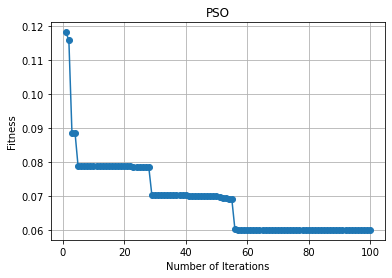

In [3]:


# perform feature selection
fmdl = jfs(feat, label, opts)


# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

mdl       = KNeighborsClassifier(n_neighbors = k) 
mdl.fit(x_train, y_train)

# accuracy
y_pred    = mdl.predict(x_valid)
Acc       = np.sum(y_valid == y_pred)  / num_valid
print("Accuracy:", 100 * Acc)

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('PSO')
ax.grid()
plt.show()

In [17]:
param_dict={}

param_dict['LogisticRegression']={
        'C':[0,-5,5],
        'class_weight':[0,0,2,['balanced','None']],
        'warm_start':[0,0,2,[True,True]]
        }

param_dict['GaussianNB']={
        'var_smoothing':[0,0,2,[10**-9,10**-9]]
        }

param_dict['ComplementNB']={
        'alpha':[0,0,2,[1,1]]
        }

dimensions=len(param_dict['LogisticRegression'])
        
upper=np.zeros(dimensions)
lower=np.zeros(dimensions)

for count, (key, value) in enumerate(param_dict['LogisticRegression'].items()):
        lower[count]=value[1]
        upper[count]=value[2]

print(upper)

lower

[5. 2. 2.]


array([-5.,  0.,  0.])

In [15]:
value

[-5, 5]